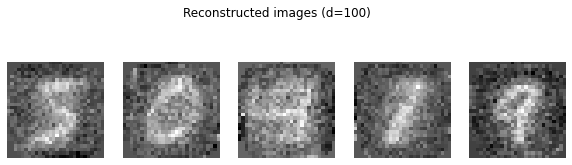

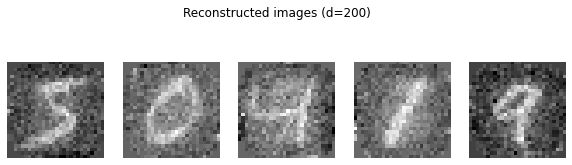

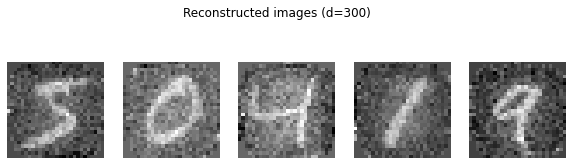

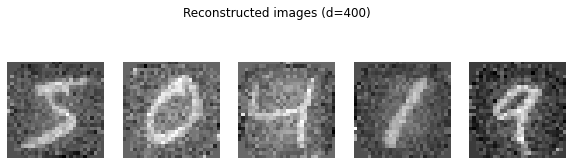

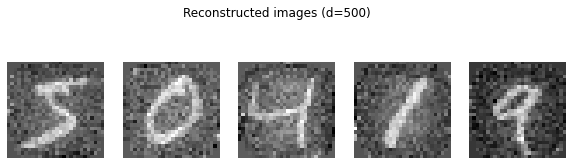

In [3]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)



data = mnist_train.data.numpy()
number_img = len(data)
num_pixels = data.shape[1] * data.shape[2]
d2_data = np.reshape(data, (number_img, num_pixels))

# Mean center the data
mean = np.mean(d2_data, axis=0)
d2_centred_data = d2_data - mean

# Compute the covariance matrix
C = (np.transpose(d2_data) @ d2_data)/(number_img)

# Compute the eigenvalues and eigenvectors
evalues, evector = np.linalg.eig(C)


# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(evalues)[::-1]
evalues = evalues[sorted_indices]
evector = evector[:, sorted_indices]

# Calculate the variance explained by each principal component
total_variance = np.sum(evalues)
variance_explained = evalues / total_variance

# Reconstruct the dataset using different dimensional representations
ds = [100, 200, 300, 400, 500]
for d in ds:
    # Project the data onto the first d principal components
    projection_matrix = evector[:, :d]
    projected_data = np.dot(d2_centred_data, projection_matrix)

    # Reconstruct the data and add back the mean
    rec_data = np.dot(projected_data, projection_matrix.T) + mean

    # Reshape the reconstructed data to its original shape
    rec_images = np.reshape(rec_data, (number_img, 28, 28))

    # Show the first 5 reconstructed images
    plt.figure(figsize=(10, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(data[i], cmap='gray')
        plt.axis('off')
        plt.subplot(1, 5, i+1)
        plt.imshow(rec_images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Reconstructed images (d={d})')
    plt.show()
